In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
import warnings
from scipy.stats import entropy
from sklearn.cluster import DBSCAN

warnings.filterwarnings("ignore")
import os
import glob


def getDF(df_raw, featurename):
    columnname = [featurename]
    df_extract = df_raw.loc[:, columnname].copy()

    if 'Time' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["Time"],
                                          format='%Y-%m-%d %H:%M:%S')

    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)

    for indx, eachrow in df_extract.iterrows():
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%W'))
    return df_extract


def getDF_bymonth(df_raw, featurename, month):
    columnname = [featurename]
    df_extract = df_raw.loc[:, columnname].copy()
    if 'Time' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["Time"],
                                          format='%Y-%m-%d %H:%M:%S')

    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)
    for indx, eachrow in df_extract.iterrows():
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%U'))
    df_monthsplit_extract = df_extract.loc[df_extract['Month'] == month]
    return df_monthsplit_extract

# Compute timeseries statistics and plot for individual patients

In [6]:
path = r''  # Specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

for f in files:
    
    p = os.path.join(path, f)

    print("Patient ID: ", int(df_id_files.id[i]))

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")
    df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

    df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
    df = df[df['glucose'] > 39]  # remove everything less than 39
    df = df[df['glucose'] < 1000]  # remove everything greater than 40
    df['glucose'].values[
        df['glucose'] >
        400] = 400  # anything greater than 400 replace with 400

    df['Dateonly'] = df["Date"].str.split("/", n=2, expand=True)[2].astype(int)

    ## Plots and statistics

    print(df[["glucose", "DoW"]].groupby("DoW").describe())

    # make boxplot with Catplot
    a = sns.catplot(x='DoW',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27,
                    order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday'))

    # add data points to boxplot with stripplot
    a = sns.stripplot(x='DoW',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D',
                      order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                             'Friday', 'Saturday', 'Sunday'))

    a.set(xlabel="Day", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Hour"]].groupby("Hour").describe())

    # make boxplot with Catplot
    b = sns.catplot(x='Hour',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    b = sns.stripplot(x='Hour',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')
    b.set(xlabel="Hour", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Month"]].groupby("Month").describe())

    # make boxplot with Catplot
    c = sns.catplot(x='Month',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27)

    # add data points to boxplot with stripplot
    c = sns.stripplot(x='Month',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    c.set(xlabel="Month", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Dateonly"]].groupby("Dateonly").describe())

    # make boxplot with Catplot
    d = sns.catplot(x='Dateonly',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    d = sns.stripplot(x='Dateonly',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    d.set(xlabel="Date of Month", ylabel="Glucose (mg/dL)")

    plt.show()
    print('=======' * 20)
    print('=======' * 20)

    i = i + 1

# Average statistics using timeseries breakdown on daily basis and classification based on gender

In [13]:
path = r''  # specify data path
demographics_path = r''  # specify data path

df_demographics = pd.read_csv(demographics_path, index_col=None)

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
Sunday = []
demographics = []

i = 0

for f in files:

    patient_demographic = df_demographics[(df_demographics['id'] == int(
        df_id_files.id[i]))]

    if not patient_demographic.empty:
        demographics.append(patient_demographic)

        p = os.path.join(path, f)

        print("Patient ID: ", int(df_id_files.id[i]))

        # reading and processing files
        df = pd.read_csv(p, index_col=None, na_values=" null")
        df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

        df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
        df = df[df['glucose'] > 39]  # remove everything less than 39
        df = df[df['glucose'] < 1000]  # remove everything greater than 40
        df['glucose'].values[
            df['glucose'] >
            400] = 400  # anything greater than 400 replace with 400

        df['Dateonly'] = df["Date"].str.split("/", n=2,
                                              expand=True)[2].astype(int)

        ## statistics
        Monday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Monday']).describe().transpose())
        Tuesday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Tuesday']).describe().transpose())
        Wednesday.append(
            pd.DataFrame(df['glucose'].loc[
                df['DoW'] == 'Wednesday']).describe().transpose())
        Thursday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Thursday']).describe().transpose())
        Friday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Friday']).describe().transpose())
        Saturday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Saturday']).describe().transpose())
        Sunday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Sunday']).describe().transpose())

    i = i + 1

Patient ID:  221634
Patient ID:  309157
Patient ID:  897741
Patient ID:  2033176
Patient ID:  2199852
Patient ID:  4762925
Patient ID:  7886752
Patient ID:  12689381
Patient ID:  13029224
Patient ID:  13484299
Patient ID:  14092221
Patient ID:  15558575
Patient ID:  15634563
Patient ID:  16975609
Patient ID:  17161370
Patient ID:  18991425
Patient ID:  19626656
Patient ID:  20216809
Patient ID:  20396154
Patient ID:  20649783
Patient ID:  21946407
Patient ID:  23428091
Patient ID:  24448124
Patient ID:  25692073
Patient ID:  26856617
Patient ID:  27526291
Patient ID:  27819368
Patient ID:  28176124
Patient ID:  28608066
Patient ID:  28756888
Patient ID:  28768536
Patient ID:  32407882
Patient ID:  32997134
Patient ID:  33962890
Patient ID:  35533061
Patient ID:  35719805
Patient ID:  37764532
Patient ID:  37948668
Patient ID:  37998755
Patient ID:  39986716
Patient ID:  40634871
Patient ID:  41131654
Patient ID:  42052178
Patient ID:  43589707
Patient ID:  45120081
Patient ID:  4732353

In [16]:
monday = pd.concat(Monday)  # convert statistics to dataframe
monday.reset_index(drop=True, inplace=True)
tuesday = pd.concat(Tuesday)
tuesday.reset_index(drop=True, inplace=True)
wednesday = pd.concat(Wednesday)
wednesday.reset_index(drop=True, inplace=True)
thursday = pd.concat(Thursday)
thursday.reset_index(drop=True, inplace=True)
friday = pd.concat(Friday)
friday.reset_index(drop=True, inplace=True)
saturday = pd.concat(Saturday)
saturday.reset_index(drop=True, inplace=True)
sunday = pd.concat(Sunday)
sunday.reset_index(drop=True, inplace=True)

all_stats3 = pd.concat(demographics)
all_stats3.reset_index(drop=True, inplace=True)
all_stats3 = all_stats3.drop(all_stats3.tail(7).index)
all_stats3 = all_stats3.filter(
    ['id', 'height', 'weight', 'age', 'gender', 'country', 'DIYTech'], axis=1)

monday_statistics = pd.concat([all_stats3, monday], axis=1)
tuesday_statistics = pd.concat([all_stats3, tuesday], axis=1)
wednesday_statistics = pd.concat([all_stats3, wednesday], axis=1)
thursday_statistics = pd.concat([all_stats3, thursday], axis=1)
friday_statistics = pd.concat([all_stats3, friday], axis=1)
saturday_statistics = pd.concat([all_stats3, saturday], axis=1)
sunday_statistics = pd.concat([all_stats3, sunday], axis=1)

## Save daily output statistics for male and females

In [14]:
result = r'' # specify data path
    
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format

monday_stats_m = monday_statistics[(monday_statistics['gender'] == 'Male')]
monday_stats_m.reset_index(drop=True)
monday_stats_m.to_csv(os.path.join(result, "monday_stats_m.csv"))

monday_stats_f = monday_statistics[(monday_statistics['gender'] == 'Female')]
monday_stats_f.reset_index(drop=True)
monday_stats_f.to_csv(os.path.join(result, "monday_stats_f.csv"))

# Plot daily average statistics

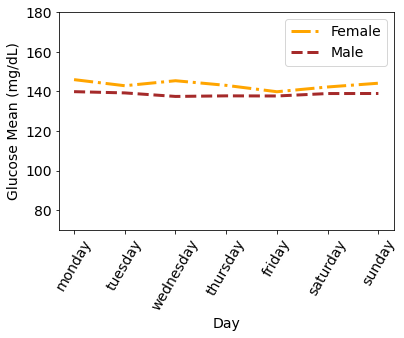

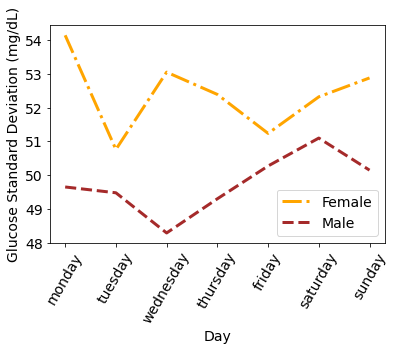

,mean,data,days,std,Day_id
8,145.991885,stats_f.csv,monday,54.142251,0
1,139.903664,stats_m.csv,monday,49.648345,0
12,142.907360,stats_f.csv,tuesday,50.759602,1
5,139.275358,stats_m.csv,tuesday,49.476195,1
13,145.437042,stats_f.csv,wednesday,53.050468,2
6,137.489728,stats_m.csv,wednesday,48.286131,2
11,143.083965,stats_f.csv,thursday,52.389695,3
4,137.783317,stats_m.csv,thursday,49.298467,3
7,139.867508,stats_f.csv,friday,51.236093,4
0,137.716681,stats_m.csv,friday,50.270050,4


In [14]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
days = [i.split('_', 1)[0] for i in files]

i = 0
mean = []
std = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean.append(df['mean'].mean())
    std.append(df['std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'days': days,
    'mean': mean,
    'std': std,
    'data': files_unstrip_IDs,
})

all_stat = pd.concat([stats], axis=1)

all_stat.sort_values('data', inplace=True, ascending=False)
all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

statt = all_stat[['mean', 'data', 'days', 'std']].sort_values('data')

sorter = [
    'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
    'sunday'
]
sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['Day_id'] = statt.index
statt['Day_id'] = statt['days'].map(sorterIndex)

statt.sort_values('Day_id', inplace=True)

da_f = statt[statt['data'] == 'stats_f.csv']
da_m = statt[statt['data'] == 'stats_m.csv']

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(da_f['days'],
              da_f['mean'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(da_m['days'],
              da_m['mean'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Day')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(da_f['days'],
              da_f['std'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(da_m['days'],
              da_m['std'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Day')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=60)
plt.show()
statt

# Plot hourly average statistics

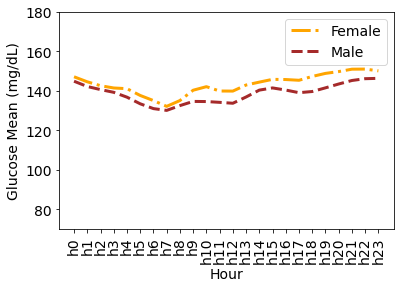

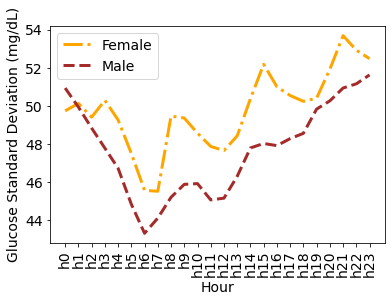

,hours,mean_m,std_m,mean_f,std_f,hour_id
0,h0,144.852227,50.932793,147.095983,49.733986,0
11,h1,142.171011,49.933113,144.552438,50.124410,1
16,h2,140.616969,48.828701,142.582262,49.404791,2
17,h3,139.231543,47.776770,141.429448,50.288675,3
18,h4,136.781015,46.717217,141.074636,49.256849,4
19,h5,133.424248,44.829261,137.647481,47.497692,5
20,h6,130.993650,43.303572,135.052980,45.556819,6
21,h7,130.090866,44.103694,132.127052,45.511040,7
22,h8,132.510147,45.196226,135.067054,49.458582,8
23,h9,134.627697,45.873938,140.293890,49.357249,9


In [15]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
hours = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'hours': hours,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('hours')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['hour_id'] = statt.index
statt['hour_id'] = statt['hours'].map(sorterIndex)

statt.sort_values('hour_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(70, 180)
ax = plt.plot(statt['hours'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['hours'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
statt

# Average Statistics based on Monthly Breakdown 

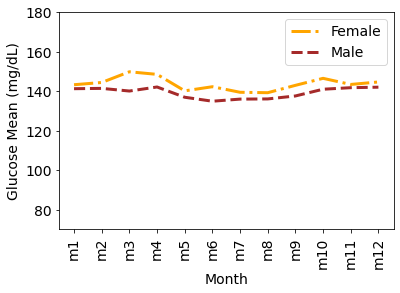

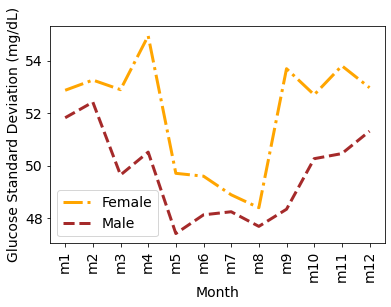

,months,mean_m,std_m,mean_f,std_f,month_id
4,m1,141.192594,51.826648,143.203621,52.875886,0.0
5,m2,141.353352,52.422430,144.335957,53.265938,1.0
6,m3,140.008330,49.642569,149.749437,52.898858,2.0
7,m4,142.054451,50.515346,148.440590,54.952709,3.0
8,m5,136.867703,47.406671,140.101919,49.704659,4.0
9,m6,134.857991,48.120864,142.189267,49.596360,5.0
10,m7,135.926744,48.238615,139.381140,48.885666,6.0
11,m8,136.015070,47.680019,139.163811,48.392636,7.0
12,m9,137.513401,48.334447,142.887962,53.699653,8.0
1,m10,140.925122,50.264295,146.438273,52.703304,9.0


In [16]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
months = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'months': months,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('months')

sorter = [
    'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['month_id'] = statt.index
statt['month_id'] = statt['months'].map(sorterIndex)

statt.sort_values('month_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(statt['months'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['months'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['months'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['months'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

statt

# Average Statistics based on Date of Month Breakdown 

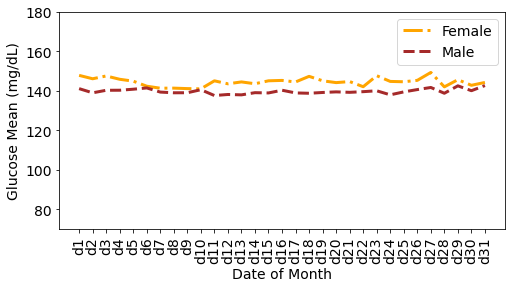

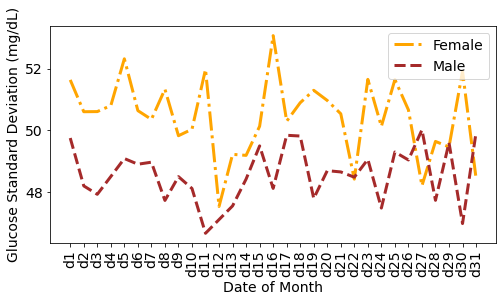

,date,mean_m,std_m,mean_f,std_f,date_id
10,d1,141.097574,49.747564,147.808991,51.632453,0
21,d2,138.977394,48.195104,146.090871,50.600743,1
24,d3,140.264595,47.922889,147.507017,50.604757,2
25,d4,140.289946,48.499641,145.831012,50.799595,3
26,d5,140.802682,49.082583,144.879594,52.316367,4
27,d6,141.449427,48.898424,142.330616,50.635910,5
28,d7,139.353886,48.964342,141.314241,50.351607,6
29,d8,138.998952,47.724005,141.349308,51.331425,7
30,d9,139.021585,48.495353,141.116513,49.822438,8
0,d10,140.549584,48.111766,140.987706,50.032479,9


In [17]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
date = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'date': date,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('date')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
    'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
    'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['date_id'] = statt.index
statt['date_id'] = statt['date'].map(sorterIndex)

statt.sort_values('date_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(statt['date'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['date'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['date'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['date'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

statt